In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import warnings

warnings.filterwarnings("ignore")

In [2]:
movies = pd.read_csv('./data/movies.csv')
movies_credits = pd.read_csv('./data/credits.csv')

In [3]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [4]:
release_year = movies["release_date"].dt.year.value_counts(dropna = False)

In [5]:
# need to filter the data so that you only retain records for years where there were 100 or more movie releases
release_year = release_year[release_year >= 100].sort_index()
release_year.index = release_year.index.astype(int)

In [6]:
years = release_year.index.to_list()
movie_counts = release_year.values.tolist()

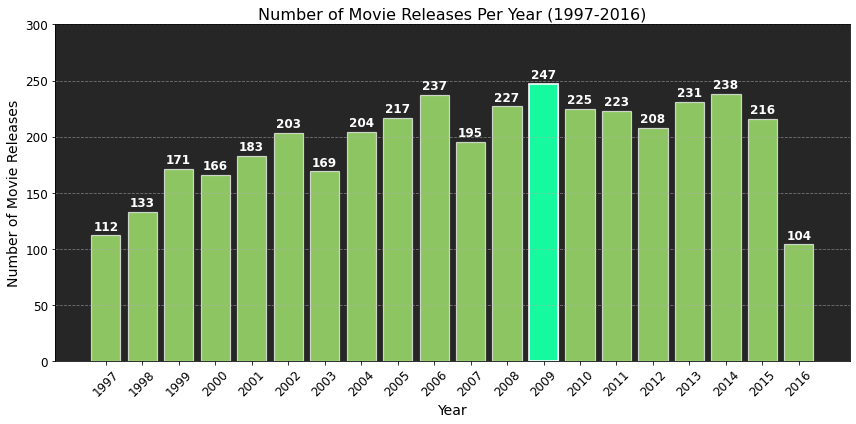

In [7]:
# Find the year with the highest movie releases
max_count_year = years[movie_counts.index(max(movie_counts))]

# Create a stylish bar chart
plt.figure(figsize=(12, 6))
plt.bar(years, movie_counts, color='#b1fc77', alpha=0.75, edgecolor='#f5f5f5', linewidth=1.2)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movie Releases', fontsize=14)
plt.title('Number of Movie Releases Per Year (1997-2016)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.grid(axis='x', linestyle='')

# Highlight the bar for the year with the highest movie releases
highlighted_bar = years.index(max_count_year)
plt.bar(years[highlighted_bar], movie_counts[highlighted_bar], color='#0affa5', alpha=0.9, edgecolor='#fff', linewidth=1.8)

# customised y-ticks range
plt.yticks(range(0, 301, 50), fontsize=12)


# Adding data labels
for year, count in zip(years, movie_counts):
    plt.text(year, count + 5, str(count), ha='center', fontsize=12, fontweight='bold', color='#fff')

# Customize tick labels
plt.xticks(years, rotation=45, fontsize=12)
plt.yticks(fontsize=12)


# Adding a background color
ax = plt.gca()
ax.set_facecolor('#262626' )

# Display the chart with improved aesthetics
plt.tight_layout()
plt.show()

### `Budget vs. Revenue Scatter Plot:`
    Create a scatter plot to visualize the relationship between budget and revenue for the movies. This can help identify if there's a correlation between the two.

In [8]:
budget = movies["budget"]
revenue = movies["revenue"]

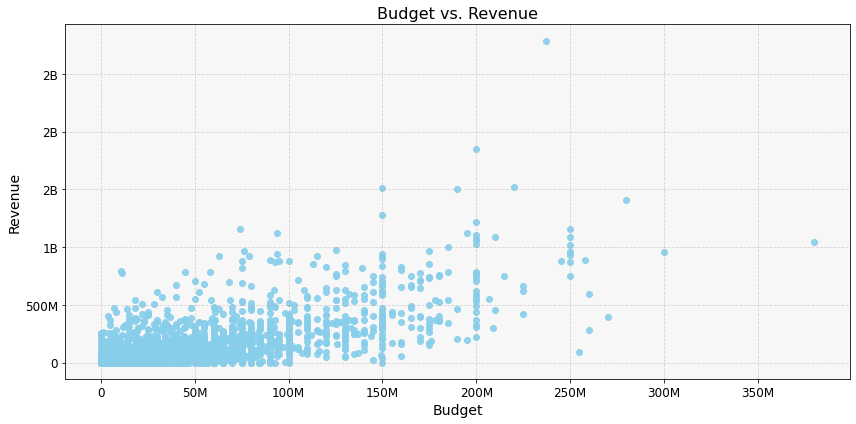

In [9]:
# Function to format budget values as alphanumeric units
def format_budget(value, pos):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B'
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'


# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(budget, revenue, color='skyblue', alpha=0.9)
plt.xlabel("Budget", fontsize=14)
plt.ylabel("Revenue", fontsize=14)
plt.title("Budget vs. Revenue", fontsize=16)

# Customize the appearance
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a background color
plt.gca().set_facecolor('#f7f7f7')

# Update x-axis and y-axis tick labels using the format_budget function
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_budget))
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(format_budget))


plt.tight_layout()
plt.show()

### `Genre Distribution Bar Chart:`
    Create a bar chart to show the distribution of movie genres. You can count the number of movies in each genre category and display it as a bar chart.

In [10]:
movies["genres"][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [11]:
genre_data = movies["genres"]
genre_data

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object

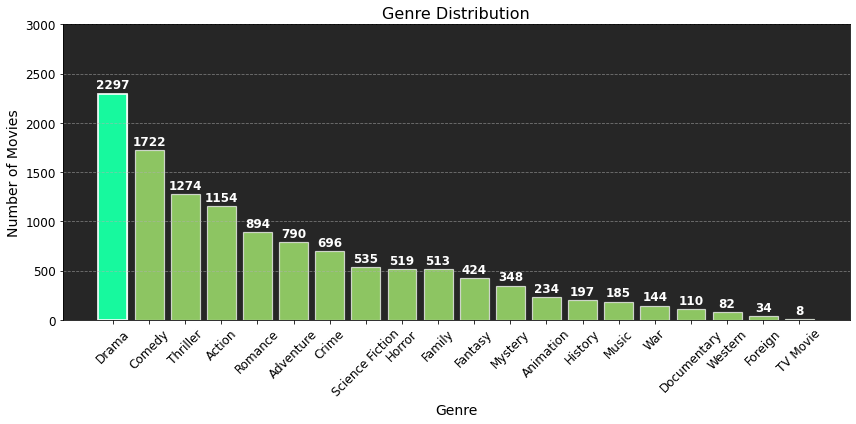

In [12]:
# Create a DataFrame from the sample data
df = pd.DataFrame({'genres': genre_data})


# Function to extract genre names from JSON data
def extract_genres(genre_json):
    genres = json.loads(genre_json)
    return [genre['name'] for genre in genres]

# Apply the extract_genres function to each row in the DataFrame
df['genre_names'] = df['genres'].apply(extract_genres)


all_genres = []

for genres in df['genre_names']:
    for genre in genres:
        all_genres.append(genre)

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Find the most common genre
most_common_genre = genre_counts.idxmax()


# Create a stylish bar chart
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.index, genre_counts.values, color='#b1fc77', alpha=0.75, edgecolor='#f5f5f5', linewidth=1.2)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.title('Genre Distribution', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.grid(axis='x', linestyle='')



# Adding a background color
ax = plt.gca()
ax.set_facecolor('#262626' )


# Highlight genre
plt.bar(most_common_genre, genre_counts[most_common_genre], color='#0affa5', alpha=0.9, edgecolor='#fff', linewidth=1.8)


# customised y-ticks range
plt.yticks(range(0, 3001, 500), fontsize=12)

# Adding data labels
for genre, count in zip(genre_counts.index, genre_counts.values):
    plt.text(genre, count + 50, str(count), ha='center', fontsize=12, fontweight='bold', color='#fff')

    
# Display the chart with improved aesthetics
plt.tight_layout()
plt.show()

### `Language Distribution Pie Chart:`
    Visualize the distribution of original languages in your dataset using a pie chart. It can show which languages are most common.

In [13]:
df = movies[["spoken_languages"]]
df.head()

,spoken_languages
0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..."
1,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
2,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},..."
3,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
4,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"


In [14]:
# Function to extract language names from JSON data
def extract_languages(language_json):
    languages = json.loads(language_json)
    return [lang['name'] for lang in languages]

In [15]:
all_languages = df['spoken_languages'].apply(extract_languages)
all_languages.head()

0                                 [English, Español]
1                                          [English]
2    [Français, English, Español, Italiano, Deutsch]
3                                          [English]
4                                          [English]
Name: spoken_languages, dtype: object

In [16]:
final_languages = []

for i in all_languages.values:
    final_languages.extend(i)

In [17]:
# Count the occurrences of each language
language_counts = pd.Series(final_languages).value_counts()
language_counts

# Filter languages with more than 100 occurrences
language_counts = language_counts[language_counts > 100]
language_counts

English     4485
Français     437
Español      351
Deutsch      262
Italiano     188
Pусский      185
普通话          107
dtype: int64

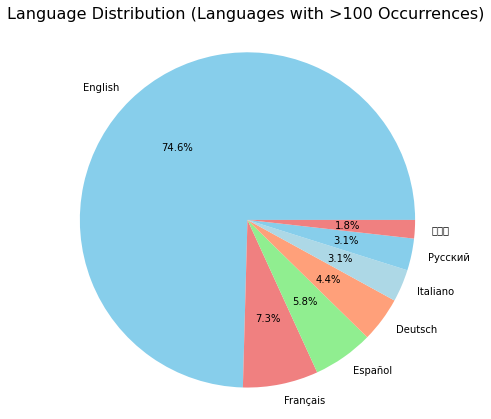

In [18]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue'])
plt.title('Language Distribution (Languages with >100 Occurrences)', fontsize=16)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()